In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/gauravduttakiit/resume-dataset/UpdatedResumeDataSet.csv


In [2]:
df=pd.read_csv('/kaggle/input/d/gauravduttakiit/resume-dataset/UpdatedResumeDataSet.csv')
df.head(3)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


In [37]:
df

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may 2013 to may 2017 be ui...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad h...
...,...,...
957,Testing,computer skills proficient in ms office word ...
958,Testing,willingness to accept the challenges positive...
959,Testing,personal skills quick learner eagerness to l...
960,Testing,computer skills software knowledge mspower po...


In [3]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [4]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [5]:
!pip install imbalanced-learn

In [6]:
df.duplicated().sum()

796

In [7]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

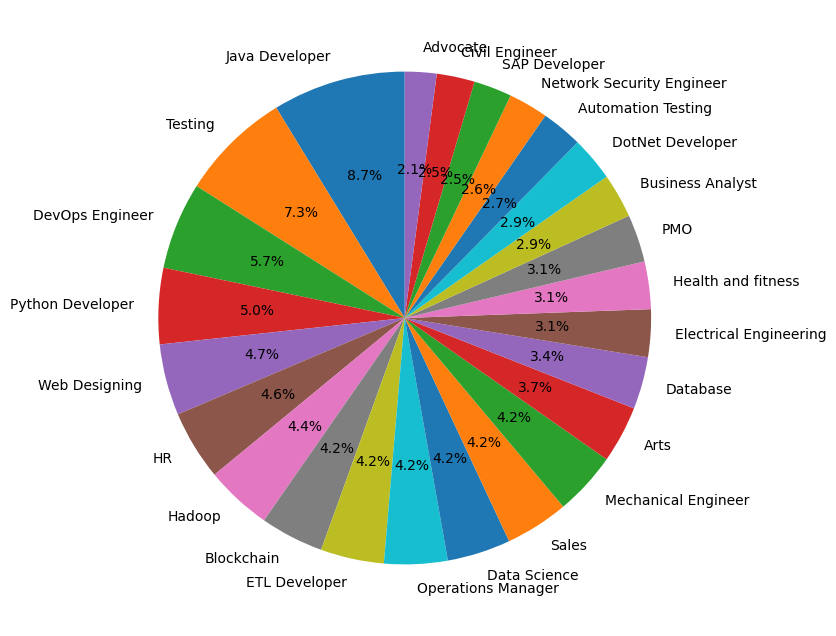

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.pie(df['Category'].value_counts(),labels= df['Category'].value_counts().index,autopct='%1.1f%%', startangle=90)
plt.show()

In [9]:
import re
import string
import nltk
from nltk.tokenize import sent_tokenize

def preprocess_text(text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_text)
    # Remove non-printable characters
    clean_text = ''.join(char for char in clean_text if char in string.printable)
   # Remove unwanted symbols and escape sequences
    clean_text = clean_text.encode('ascii', 'ignore').decode('utf-8')
    clean_text = clean_text.replace("\r\n", "")

    # Tokenize into sentences
    sentences = sent_tokenize(clean_text)
    
    # Process each sentence
    processed_sentences = []
    for sentence in sentences:
        # Remove punctuation
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Append the processed sentence to the list
        processed_sentences.append(sentence)
    
    # Join the processed sentences back into a single string
    clean_text = ' '.join(processed_sentences)
    
    return clean_text


df['Resume'] = df['Resume'].apply(preprocess_text)



In [10]:
df['Resume'][3]

'skills  r  python  sap hana  tableau  sap hana sql  sap hana pal  ms sql  sap lumira  c  linear programming  data modelling  advance analytics  scm analytics  retail analytics social media analytics  nlp education details january 2017 to january 2018 pgdm business analytics  great lakes institute of management  illinois institute of technologyjanuary 2013 bachelor of engineering electronics and communication bengaluru karnataka new horizon college of engineering bangalore visvesvaraya technological universitydata science consultant consultant  deloitte usiskill details linear programming exprience  6 monthsretail exprience  6 monthsretail marketing exprience  6 monthsscm exprience  6 monthssql exprience  less than 1 year monthsdeep learning exprience  less than 1 year monthsmachine learning exprience  less than 1 year monthspython exprience  less than 1 year monthsr exprience  less than 1 year monthscompany details company  deloitte usidescription  the project involved analysing histo

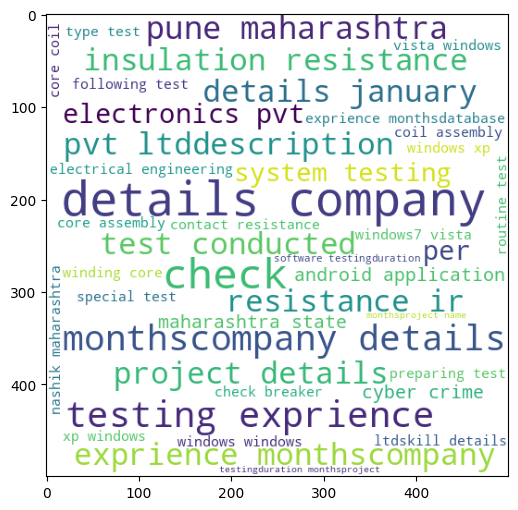

In [11]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive_wc = wc.generate(df[df['Category'] == 'Testing']['Resume'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [12]:
x=df['Resume']
from sklearn.preprocessing import LabelEncoder
categories = df['Category']
label_encoder = LabelEncoder()
category_encoded = label_encoder.fit_transform(categories)
category_mapping = dict(zip(categories, category_encoded))
# Print the dictionary
print(category_mapping)


{'Data Science': 6, 'HR': 12, 'Advocate': 0, 'Arts': 1, 'Web Designing': 24, 'Mechanical Engineer': 16, 'Sales': 22, 'Health and fitness': 14, 'Civil Engineer': 5, 'Java Developer': 15, 'Business Analyst': 4, 'SAP Developer': 21, 'Automation Testing': 2, 'Electrical Engineering': 11, 'Operations Manager': 18, 'Python Developer': 20, 'DevOps Engineer': 8, 'Network Security Engineer': 17, 'PMO': 19, 'Database': 7, 'Hadoop': 13, 'ETL Developer': 10, 'DotNet Developer': 9, 'Blockchain': 3, 'Testing': 23}


In [13]:
category_encoded.shape

(962,)

In [14]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
count=TfidfVectorizer(ngram_range=(4,4),stop_words='english',max_features=6000)
b_matrix=count.fit_transform(x)
b_df=pd.DataFrame(data=b_matrix.toarray(),columns=count.get_feature_names_out())

In [15]:
b_df.shape

(962, 6000)

In [16]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
x_res,y_res=sm.fit_resample(b_matrix,category_encoded)
from collections import Counter
print(Counter(category_encoded))
print(Counter(y_res))

Counter({15: 84, 23: 70, 8: 55, 20: 48, 24: 45, 12: 44, 13: 42, 6: 40, 16: 40, 22: 40, 18: 40, 10: 40, 3: 40, 1: 36, 7: 33, 14: 30, 11: 30, 19: 30, 4: 28, 9: 28, 2: 26, 17: 25, 5: 24, 21: 24, 0: 20})
Counter({6: 84, 12: 84, 0: 84, 1: 84, 24: 84, 16: 84, 22: 84, 14: 84, 5: 84, 15: 84, 4: 84, 21: 84, 2: 84, 11: 84, 18: 84, 20: 84, 8: 84, 17: 84, 19: 84, 7: 84, 13: 84, 10: 84, 9: 84, 3: 84, 23: 84})


In [17]:
y_res.shape

(2100,)

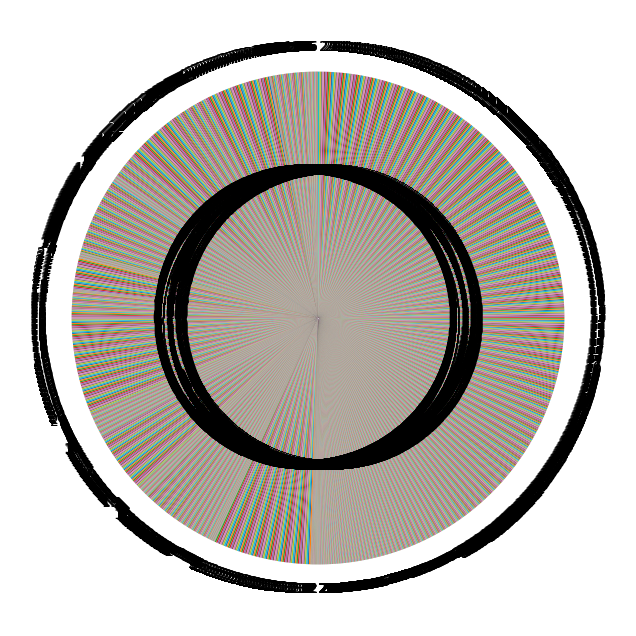

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.pie(y_res,labels= y_res,autopct='%1.1f%%', startangle=90)
plt.show()

In [19]:
#split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [27]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(MultinomialNB()).fit(x_train, y_train)
#svm = SVC(kernel='RBF', C=1.0)
prediction_mnb = clf.predict(x_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 0.93
Accuracy of MultinomialNB Classifier on test set: 0.92


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=1.0)
svm.fit(x_train,y_train)
predict=svm.predict(x_test)
print(accuracy_score(predict,y_test))

0.9380952380952381


In [32]:
import pickle
pickle.dump(count,open('vectamir.pkl','wb'))
pickle.dump(svm,open('modalamir.pkl','wb'))

In [22]:
myresume = """I am a data science specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [35]:
resume='''Designing, manufacturing, and installing components that fulfill requirements.
Analyzing problems or deficiencies and developing solutions to resolve them.
Conducting experiments and evaluations to improve and innovate product designs.
Creating plans and designs using CAD technology.
Estimating budgets and time scopes for each project.
Writing technical documentation for machine operators.
Ensuring that products meet compliance regulations.
Collaborating with project managers and other engineers in our team.
Mechanical engineers use their technical and problem-solving skills to develop products and systems.
They also need to be able to work independently and as part of a team.
A Mechanical Engineer Resume should include effective technical skills, problem-solving skills, creativity, interpersonal skills, verbal and written communication skills, commercial awareness, and teamwork abilities.
Mechanical engineers need to have strong attention to detail.
Mechanical engineers use their technical and problem-solving skills to develop products and systems.
They also need to be able to work independently and as part of a team.
A Mechanical Engineer Resume should include effective technical skills, problem-solving skills, creativity, interpersonal skills, verbal and written c

'''

In [38]:
resum2 ='''Jobvertise,Digital Marketing Manager,https://www.glassdoor.com/partner/jobListing.htm?pos=102&ao=129608&s=58&guid=0000015b9476f35987a265b0a3254103&src=GD_JOB_AD&t=SR&extid=1&exst=OL&ist=&ast=OL&vt=w&slr=true&rtp=0&cb=1492844475540&jobListingId=2398043328," Dallas, TX","Berlin, Germany",1 to 50 employees,2011,Unknown," The Digital Marketing Manager is the front line of patient, consumer and audience engagement for EyeCare Services Partners and its affiliates, leading and defining the digital marketing mix, with an emphasis on social media, web, email and content marketing. The Digital Marketing Manager will work closely with cross functional teams to plan and execute high impact marketing strategies designed to drive results.Essential Functions Own and execute digital brand presence through social media, web, and email strategies, implementing best practices and utilizing data and insights for continued evolution Understand digital platforms and upcoming trends with ability to foster into tangible action for brand Leverage brand and consumer/patient insight to engage and foster stronger consumer engagement across digital platforms Lead project based marketing initiatives such as influencer and engagement campaigns Manage day-to-day communications with internal teams, brands, partners, and patients/consumers Oversee practice website redesign Introduce Patient Communication Software (solution reach) Introduce and assist with internet and marketing packages (Glacial) Manage content for corporate web site Manage digital (organic and paid) channels, and track, and analyze all digital marketing efforts Create Marketing Collateral as needed for both corporate and practices (i.e. trade show banners, email blasts, flyers, posters, ads, concepts for radio, seasonal campaigns for specialty services, Lasik, cosmetic, PIOLS, Kamra, Cataracts, Flex Spending, and back to school exams and/or glasses)Requirements Bachelors Degree or 5+ years of related work experience in digital marketing, content marketing, social media, or copy writing is required This is a hands-on role that requires excellent collaborative, organizational, and creative skills and ability to build a strategy and execute across multiple digital disciplines Strong experience with digital content across platforms, and a clear understanding of how content is conceptualized, created, and promoted Experience working with digital media based data and analytics, and how to turn insights into actions A strong understanding of digital marketing across all disciplines including social, search, email and websites and content Experience managing and maintaining content driven websites, email and social media channels Strong writer capable of internalizing and articulating the brand voice, and to clearly present ideas and points of view to internal teams"
3, Santander Consumer USA,"Manager, Pricing Management Information Systems",https://www.glassdoor.com/partner/jobListing.htm?pos=103&ao=199853&s=58&guid=0000015b9476f35987a265b0a3254103&src=GD_JOB_AD&t=SR&extid=1&exst=OL&ist=&ast=OL&vt=w&slr=true&rtp=0&cb=1492844475542&jobListingId=2013633573," Dallas, TX","Dallas, TX",5001 to 10000 employees,1995,Finance," Summary of Responsibilities:The Manager Pricing MIS will be responsible for assisting the Pricing & Strategy and Profitability Teams within Decision Sciences in the execution of information gathering and reporting. Manager Pricing MIS is responsible for managing development and production of pricing reporting and supervising analysts responsible for converting existing daily, weekly, monthly and ad-hoc reports to more efficient delivery tools which includes data visualization. Supervision of a portion of the Pricing MIS team will require leadership and direction for timely internal and regulatory, ongoing and ad-hoc reporting support to Pricing & Strategy and Profitability segments within Decision Sciences. Consistency and quality of information reports along with repository management will be critical.Essential Job Functions:Responsible for assisting the Decision Sciences team in the design, development, implementation and production of pricing reporting needs in ongoing and ad-hoc environmentAdditionally responsible for managing the automation implementation process for all new reports, as appropriate, and converting existing Business as usual reports to an automated delivery process.Responsible for working with Information Technology organization, assigned consultants and existing staff to develop a governance process for converting appropriate reports to an efficient Data Visualization mechanism.Drive, adopt and develop best practices in report templates and toolsEstablish and manage Pricing Governance team drive location, SharePoint sites and repository of documentsAssure clear, concise and objective reportingIdentify and escalate issues and observations as they ariseOther Functions:Maintain ongoing relationships with management throughout the organization and effectively manage and motivate the teamComplete reviews/projects and additional work within specified timescales and in line with departmental standardsResponsible for all aspects of the team members life cycle including, recruitment, performance management, development and coachingEnsure that all tasks are carried out with a high degree of professionalism.Daily support of junior analysts and interns relative to the production of reporting deliverables.Requirements:Bachelors degree in computer or MIS or a related field, or equivalent combination of education and experience, required.One (1) to three (3) years of previous management experience required or 3 years specific auto industry experience working in a reporting environment.Internal candidates who do not meet the stated requirements for management experience (but, are otherwise qualified) may be selected for this role contingent upon the completion of a prescribed training plan.3 -5 years of progressively responsible experience within financial services management or MIS within a financial services institution requiredExpertise with PC software applications such as SQL, SAS, Excel, Word, PowerPoint, Access and DashboardsExperience with Tableau or similar data visualization tools a plusDetailed knowledge of information reporting structures (Extraction, Transformation and Loading (ETLs), Data Management, Data Warehouse, data validation models etc.)Knowledge of financial statements, accounting principles, Credit Policy, applicable laws and industry data sources.Dedication to information integrity and accurate reportingExcellent analytical, technical and problem solving skills, with strong attention to detailAbility to effectively explain to others how to understand and approach complicated issuesExceptional verbal and written communication, collaboration, and time management skillsPossess strong leadership skills with focus on development and mentorshipAbility to adapt to various work environments and project schedulesAbility to work effectively in a team environment with all levels of personnelSelf-directed with ability to multitask and prioritizeAbility to maintain strict confidentialitySuperior leadership and organizational skillsStrategic and tactical thinkerWorking Conditions:Extended working hours may be required as dictated by management and business needs.Travel to multiple facilities may be required.May be required to lift, push, or pull materials weighing up to twenty (20) pounds.May be required to sit and review information on a computer screen for long periods of time.May require repetitive motions of the hands and wrist related to writing and typing at an electronic keyboard.Corporate / satellite office role.Employers Rights:This job description does not list all the duties of the job. You may be asked by your supervisors or managers to perform other duties. You will be evaluated in part based upon your performance of the tasks listed in this job description.The employer has the right to revise this job description at any time. This job description is not a contract for employment, and either you or the employer may terminate employment at any time, for any reason."'''

In [42]:
import pickle

count = pickle.load(open('vectamir.pkl', 'rb'))
clf = pickle.load(open('modalamir.pkl', 'rb'))

cleaned_resume = preprocess_text(resum2)
input_features = count.transform([cleaned_resume])
prediction_id = svm.predict(input_features)[0]

category_mapping = {
                   15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
                   }
category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Advocate
0
